In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'user_features.csv', 'train.csv', 'sample_submission_only_headers.csv']


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from sklearn import metrics

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [28]:
hike1 = pd.read_csv('../input/train.csv')
hike2 = pd.read_csv('../input/user_features.csv')
hike1_1=hike1[hike1.is_chat == 1].head(10000)
hike1_0=hike1[hike1.is_chat ==0].head(10000)
hike1= pd.concat([hike1_1,hike1_0], axis=0)
hike1.shape

(20000, 3)

In [29]:
hike2.columns = ['node1_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13']
hike = hike1.merge(hike2, on='node1_id')
hike.columns = ['node1_id', 'node2_id', 'is_chat', 'f1_1', 'f2_1', 'f3_1', 'f4_1', 'f5_1', 'f6_1',
       'f7_1', 'f8_1', 'f9_1', 'f10_1', 'f11_1', 'f12_1', 'f13_1']
hike2.columns = ['node2_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13']
hikedf = hike.merge(hike2, on='node2_id')

In [30]:
hikedf['f1'] = (hikedf['f1']+2*hikedf['f1_1'])/3
hikedf['f2'] = (hikedf['f2']+2*hikedf['f2_1'])/3
hikedf['f3'] = (hikedf['f3']+2*hikedf['f3_1'])/3
hikedf['f4'] = (hikedf['f4']+2*hikedf['f4_1'])/3
hikedf['f5'] = (hikedf['f5']+2*hikedf['f5_1'])/3
hikedf['f6'] = (hikedf['f6']+2*hikedf['f6_1'])/3
hikedf['f7'] = (hikedf['f7']+2*hikedf['f7_1'])/3
hikedf['f8'] = (hikedf['f8']+2*hikedf['f8_1'])/3
hikedf['f9'] = (hikedf['f9']+2*hikedf['f9_1'])/3
hikedf['f10'] = (hikedf['f10']+2*hikedf['f10_1'])/3
hikedf['f11'] = (hikedf['f11']+2*hikedf['f11_1'])/3
hikedf['f12'] = (hikedf['f12']+2*hikedf['f12_1'])/3
hikedf['f13'] = (hikedf['f13']+2*hikedf['f13_1'])/3

hikedf.drop(['f1_1', 'f2_1', 'f3_1', 'f4_1',
       'f5_1', 'f6_1', 'f7_1', 'f8_1', 'f9_1', 'f10_1', 'f11_1', 'f12_1',
       'f13_1'], axis=1, inplace=True)

x= hikedf.drop(['node1_id', 'node2_id', 'is_chat'], axis=1)
y= hikedf.is_chat

In [31]:
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_split, x_test, y_split, y_test = train_test_split(x,y,test_size=0.2, random_state=100) 
x_train, x_val, y_train, y_val = train_test_split(x_split,y_split,test_size=0.2, random_state=100)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
x_val_std = sc.transform(x_val)

### 1. Logistic Regression

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
print('The accuracy score for Logistic Regression model is %1.2f per cent' %((logreg.score(x_test,y_test))*100))

The accuracy score for Logistic Regression model is 69.08 per cent


### 2. KNN Classifier

In [33]:
knncl = KNeighborsClassifier()
param= {'n_neighbors': range(1,30)}
knngrid = GridSearchCV(knncl, param_grid= param, cv=5)
knngrid.fit(x_val_std,y_val) #for distance based model we use standardize values
knngrid.best_params_

{'n_neighbors': 25}

In [35]:
knncl = KNeighborsClassifier(n_neighbors=25)
knncl.fit(x_train_std,y_train)
print('The accuracy score for KNN Classifier model is %1.2f per cent' %((knncl.score(x_test_std,y_test))*100))

The accuracy score for KNN Classifier model is 70.20 per cent


### 3. Decision Tree

In [36]:
dtcl = DecisionTreeClassifier()
params= {'max_depth': np.arange(1,30)}
dtgrid= GridSearchCV(dtcl,params,cv=5)
dtgrid.fit(x_val,y_val)
dtgrid.best_params_

{'max_depth': 4}

In [37]:
dtcl = DecisionTreeClassifier(max_depth=4)
dtcl.fit(x_train, y_train)
print('The accuracy score for Decision Tree model is %1.2f per cent' %((dtcl.score(x_test,y_test)*100)))

The accuracy score for Decision Tree model is 70.12 per cent


### 4. Naive Bayes Model

In [38]:
gnbcl = GaussianNB()
gnbcl.fit(x_train, y_train)
print('The accuracy score for Gaussian Naive Bayes model is %1.2f per cent' %((gnbcl.score(x_test,y_test)*100)))

The accuracy score for Gaussian Naive Bayes model is 67.27 per cent


### 5. Multinomial Naive Bayes

In [39]:
mncl = MultinomialNB()
mncl.fit(x_train, y_train)
print('The accuracy score for Multinominal Naive Bayes model is %1.2f per cent' %((mncl.score(x_test,y_test)*100)))

The accuracy score for Multinominal Naive Bayes model is 68.05 per cent


### 6. Random Forest

In [40]:
rfcl = RandomForestClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(rfcl, param_distributions=param, n_iter=80)
randomCV.fit(x_val,y_val)
randomCV.best_params_

{'n_estimators': 56}

In [41]:
rfcl = RandomForestClassifier(n_estimators=56)
rfcl.fit(x_train, y_train)
print('The accuracy score for Random Forest model is %1.2f per cent' %((rfcl.score(x_test,y_test)*100)))

The accuracy score for Random Forest model is 71.45 per cent


### 7. Bagging Classifier

In [42]:
bgcl = BaggingClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(bgcl, param_distributions=param, n_iter=80)
randomCV.fit(x_val,y_val)
randomCV.best_params_

{'n_estimators': 59}

In [43]:
bgcl = BaggingClassifier(n_estimators=59)
bgcl.fit(x_train, y_train)
print('The accuracy score for Bagging Classifier model is %1.2f per cent' %((bgcl.score(x_test,y_test)*100)))

The accuracy score for Bagging Classifier model is 71.75 per cent


### 8. Adaptive Boosting

In [44]:
abcl = AdaBoostClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(abcl, param_distributions=param, n_iter=80)
randomCV.fit(x_val,y_val)
randomCV.best_params_

{'n_estimators': 11}

In [45]:
abcl = AdaBoostClassifier(n_estimators=11)
abcl.fit(x_train, y_train)
print('The accuracy score for Adaptive Boosting model is %1.2f per cent' %((abcl.score(x_test,y_test)*100)))

The accuracy score for Adaptive Boosting model is 70.03 per cent


### 9. Gradient Boosting

In [46]:
gbcl = GradientBoostingClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(gbcl, param_distributions=param, n_iter=80)
randomCV.fit(x_val,y_val)
randomCV.best_params_

{'n_estimators': 76}

In [47]:
gbcl = GradientBoostingClassifier(n_estimators = 76)
gbcl.fit(x_train,y_train)
print('The accuracy score for Gradient Boosting model is %1.2f per cent' %((gbcl.score(x_test,y_test)*100)))

The accuracy score for Gradient Boosting model is 73.00 per cent


### 10. XG Boost

In [48]:
xgcl = xgb.XGBClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(xgcl, param_distributions=param, n_iter=80)
randomCV.fit(x_val,y_val)
randomCV.best_params_

{'n_estimators': 78}

In [49]:
xgcl = xgb.XGBClassifier(n_estimators=78)
xgcl.fit(x_train, y_train)
print('The accuracy score for XG Boost model is %1.2f per cent' %((xgcl.score(x_test,y_test)*100)))

The accuracy score for XG Boost model is 73.32 per cent


### 11. Voting Classifier

In [51]:
vocl = VotingClassifier(estimators = [('RandomForest', rfcl),('Bagging Classifier', bgcl),('Gradient Boosting',gbcl), 
                                      ('XG Boost Classifier',xgcl), ('Ada Boosting',abcl)]
                       , voting='soft')
vocl.fit(x_train,y_train)
print('The accuracy of voting model is : %1.4f' %vocl.score(x_test,y_test))

The accuracy of voting model is : 0.7305


0.8028845853103664


(-0.05, 1.05)

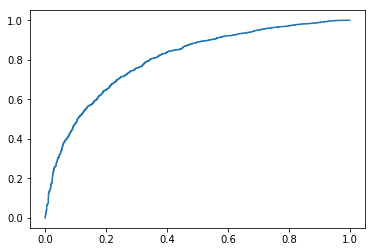

In [52]:
y_pred = vocl.predict_proba(x_test)

fpr,tpr,thr = metrics.roc_curve(y_test,y_pred[:,1])
roc_auc = metrics.auc(fpr,tpr)

print(roc_auc)

plt.figure()
plt.plot(fpr,tpr)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

## K-Fold Analysis

In [53]:
models=[]
models.append(('Logistic Regression', logreg))
models.append(('Naive Bayes     ', gnbcl))
models.append(('Mutinominal NB   ', mncl))
models.append(('KNeighbour      ',knncl))
models.append(('Decision Tree     ',dtcl))
models.append(('Random Forest   ', rfcl))
models.append(('Bagging Classifier', bgcl))
models.append(('Ada Boosting     ',abcl))
models.append(('Gradient Boosting',gbcl))
models.append(('XG Boost Classifier',xgcl))
models.append(('Voting Classifier ',vocl))

In [54]:
results= []
names= []

for name,model in models:
    kfold= model_selection.KFold(n_splits = 10, random_state=2, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s:\t %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

Logistic Regression:	 0.687850 (0.007135)
Naive Bayes     :	 0.671550 (0.008125)
Mutinominal NB   :	 0.686500 (0.008207)
KNeighbour      :	 0.701500 (0.008573)
Decision Tree     :	 0.699950 (0.007973)
Random Forest   :	 0.707300 (0.011261)
Bagging Classifier:	 0.705300 (0.010186)
Ada Boosting     :	 0.699050 (0.013120)
Gradient Boosting:	 0.723500 (0.010794)
XG Boost Classifier:	 0.723250 (0.011695)
Voting Classifier :	 0.720700 (0.010238)


In [55]:
test = pd.read_csv('../input/test.csv')

hike2.columns = ['node1_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13']
test1 = test.merge(hike2, on='node1_id')

test1.columns = ['id','node1_id', 'node2_id', 'f1_1', 'f2_1', 'f3_1', 'f4_1', 'f5_1', 'f6_1',
       'f7_1', 'f8_1', 'f9_1', 'f10_1', 'f11_1', 'f12_1', 'f13_1']

hike2.columns = ['node2_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13']

testdf = test1.merge(hike2, on='node2_id')

In [56]:
testdf['f1'] = (testdf['f1']+2*testdf['f1_1'])/3
testdf['f2'] = (testdf['f2']+2*testdf['f2_1'])/3
testdf['f3'] = (testdf['f3']+2*testdf['f3_1'])/3
testdf['f4'] = (testdf['f4']+2*testdf['f4_1'])/3
testdf['f5'] = (testdf['f5']+2*testdf['f5_1'])/3
testdf['f6'] = (testdf['f6']+2*testdf['f6_1'])/3
testdf['f7'] = (testdf['f7']+2*testdf['f7_1'])/3
testdf['f8'] = (testdf['f8']+2*testdf['f8_1'])/3
testdf['f9'] = (testdf['f9']+2*testdf['f9_1'])/3
testdf['f10'] = (testdf['f10']+2*testdf['f10_1'])/3
testdf['f11'] = (testdf['f11']+2*testdf['f11_1'])/3
testdf['f12'] = (testdf['f12']+2*testdf['f12_1'])/3
testdf['f13'] = (testdf['f13']+2*testdf['f13_1'])/3

testdf.drop(['f1_1', 'f2_1', 'f3_1', 'f4_1',
       'f5_1', 'f6_1', 'f7_1', 'f8_1', 'f9_1', 'f10_1', 'f11_1', 'f12_1',
       'f13_1'], axis=1, inplace=True)

idn = testdf.id
test = testdf.drop(['id','node1_id','node2_id'], axis=1)

In [57]:
vocl.fit(x,y)
pred = xgcl.predict_proba(test)
output = pd.DataFrame({'id': idn, 'is_chat': pred[:,1]})
output.sort_values('id',inplace=True)
output.to_csv('Voting_Balanced_new.csv', index=False)